In [31]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
def preprocess(text: str) -> str:
    doc = nlp(text)
    procecess = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return " ".join(procecess)

In [4]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]


corpus_processed = [preprocess(sentence) for sentence in corpus]
corpus_processed

['thor eat pizza Loki eat pizza Ironman eat pizza',
 'Apple announce new iphone tomorrow',
 'Tesla announce new model-3 tomorrow',
 'Google announce new pixel-6 tomorrow',
 'Microsoft announce new surface tomorrow',
 'Amazon announce new eco dot tomorrow',
 'eat biryani eat grape']

In [10]:
tfidf = TfidfVectorizer()
transform = tfidf.fit_transform(corpus_processed)

In [11]:
transform.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.58370322, 0.        , 0.        , 0.        , 0.        ,
        0.23439471, 0.23439471, 0.        , 0.        , 0.        ,
        0.        , 0.70318413, 0.        , 0.        , 0.23439471,
        0.        ],
       [0.        , 0.318328  , 0.58991604, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.58991604,
        0.        , 0.        , 0.        , 0.        , 0.318328  ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.318328  ],
       [0.        , 0.318328  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.58991604, 0.318328  ,
        0.        , 0.        , 0.        , 0.58991604, 0.        ,
        0.318328  ],
       [0.        , 0.318328  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.58991604, 0.       

In [6]:
print(tfidf.vocabulary_)

{'thor': 19, 'eat': 5, 'pizza': 16, 'loki': 11, 'ironman': 10, 'apple': 2, 'announce': 1, 'new': 14, 'iphone': 9, 'tomorrow': 20, 'tesla': 18, 'model': 13, 'google': 7, 'pixel': 15, 'microsoft': 12, 'surface': 17, 'amazon': 0, 'eco': 6, 'dot': 4, 'biryani': 3, 'grape': 8}


In [9]:
feature_names = tfidf.get_feature_names_out()
for name in feature_names:
    index = tfidf.vocabulary_.get(name)
    idf_score = tfidf.idf_[index]

    print("{}: {:.4f}".format(name, idf_score))

amazon: 2.3863
announce: 1.2877
apple: 2.3863
biryani: 2.3863
dot: 2.3863
eat: 1.9808
eco: 2.3863
google: 2.3863
grape: 2.3863
iphone: 2.3863
ironman: 2.3863
loki: 2.3863
microsoft: 2.3863
model: 2.3863
new: 1.2877
pixel: 2.3863
pizza: 2.3863
surface: 2.3863
tesla: 2.3863
thor: 2.3863
tomorrow: 1.2877


#### work on Ecommerce data to classify on a category

In [12]:
data = pd.read_csv("data/Ecommerce_data.csv")
data.head(5)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [13]:
data.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    24000 non-null  object
 1   label   24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB


In [15]:
ecommerce_data = data.copy()

In [16]:
ecommerce_data["text_processed"] = ecommerce_data["Text"].apply(preprocess)

In [18]:
ecommerce_data["label_num"] = ecommerce_data["label"].map({
                                                        "Household": 0, 
                                                        "Electronics": 1, 
                                                        "Clothing & Accessories": 2, 
                                                        "Books": 3
                                                        })

In [19]:
ecommerce_data.head(5)

,Text,label,text_processed,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,Urban Ladder Eisner low Study Office Computer ...,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,contrast live Wooden Decorative Box Painted Bo...,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,IO Crest SY PCI40010 PCI raid Host Controller ...,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,Indira Designer Women Art Mysore Silk Saree Bl...,2


In [20]:
X_train , X_test, y_train, y_test = train_test_split(ecommerce_data["text_processed"],
                                                     ecommerce_data["label_num"],
                                                     test_size= 0.2,
                                                     random_state=42,
                                                     stratify=ecommerce_data["label_num"])

In [24]:
y_train.value_counts()

label_num
3    4800
2    4800
1    4800
0    4800
Name: count, dtype: int64

In [25]:
y_test.value_counts()

label_num
0    1200
1    1200
2    1200
3    1200
Name: count, dtype: int64

#### Naive Bayes Classification

In [21]:
naive_clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

In [22]:
naive_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [23]:
y_pred = naive_clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1252
           1       0.97      0.97      0.97      1200
           2       0.98      0.97      0.98      1209
           3       0.94      0.99      0.96      1139

    accuracy                           0.96      4800
   macro avg       0.96      0.97      0.97      4800
weighted avg       0.97      0.96      0.96      4800



### KNN

In [26]:
knn_clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("knn", KNeighborsClassifier())
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('knn', KNeighborsClassifier())])

In [27]:
y_pred = knn_clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1241
           1       0.96      0.97      0.97      1195
           2       0.97      0.98      0.98      1191
           3       0.95      0.98      0.97      1173

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



### Random Forest

In [28]:
randomforest_clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("random_forest", RandomForestClassifier())
])

randomforest_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier())])

In [29]:
y_pred = randomforest_clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1209
           1       0.97      0.98      0.98      1186
           2       0.98      0.98      0.98      1205
           3       0.98      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



#### Confusion Matrix

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1161,    8,   18,   13],
       [  25, 1164,    2,    9],
       [  11,    8, 1177,    4],
       [  12,    6,    8, 1174]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

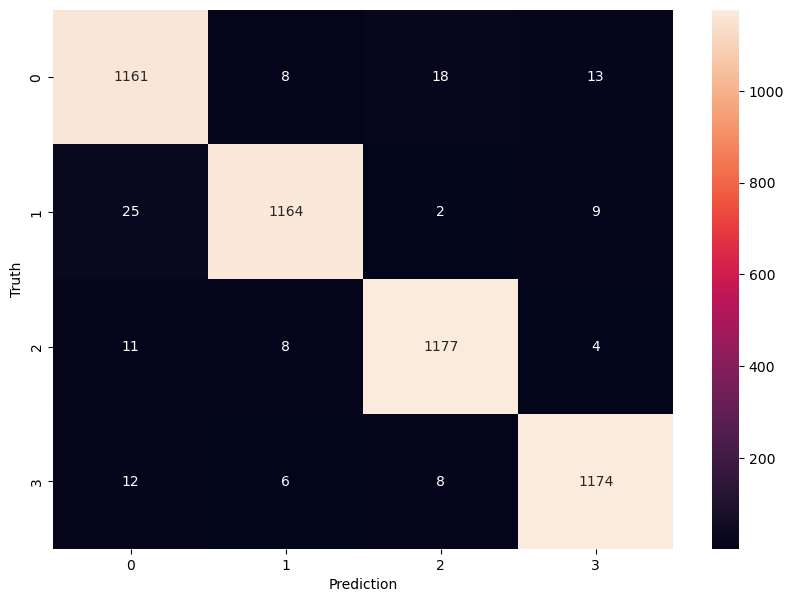

In [33]:
plt.figure(figsize=(10 ,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")